# Aula 10 Comparação de performance

<img  src='img/PvsJ.jpg' width='400' height='400' />
Nesta aula vamos tentar responder à pergunta: como tornar nosso código em Python mais rápido? Para isso vamos aplicar dois exemplos, com graus de dificuldade diferentes, e resolve-os aplicando `for`, `comprehension`, `generators`, `buil-in functions`, e `numpy arrays`. Em cada exemplo será executado o código `n` vezes para conseguir identificar o tempo máximo, mínimo, médio, a variança do tempo e o desvio padrão.

Os dados foram obtidos num computador com as seguintes características:

- Processador Intel® Core™ i7-6500U
- Memória 16 Gb
- CPU @ 2.50GHz × 4
- Arquitetura 64 bits

Os resultados que serão apresentados não consideram o uso de Multithread ou implementações alternativas como PyPy ou Numba.



## Exemplo 1
Vamos trabalhar com um vetor de 1.000.000 de valore e estamos interessados aplicar a seguinte função:

$$f(x) = x^2$$

Para conseguir este resultado será utilizado:
  - for
  - list comprehension
  - set comprehension
  - generators
  - Numpy
---

In [1]:
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = range(1, NUMERO_DE_ELEMENTOS + 1)
vetor

range(1, 1000001)

### Utilizando `for`

In [2]:
vetor_square_for = []
for valor in vetor:
    vetor_square_for.append(valor**2)
vetor_square_for

[1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500,
 2601,
 2704,
 2809,
 2916,
 3025,
 3136,
 3249,
 3364,
 3481,
 3600,
 3721,
 3844,
 3969,
 4096,
 4225,
 4356,
 4489,
 4624,
 4761,
 4900,
 5041,
 5184,
 5329,
 5476,
 5625,
 5776,
 5929,
 6084,
 6241,
 6400,
 6561,
 6724,
 6889,
 7056,
 7225,
 7396,
 7569,
 7744,
 7921,
 8100,
 8281,
 8464,
 8649,
 8836,
 9025,
 9216,
 9409,
 9604,
 9801,
 10000,
 10201,
 10404,
 10609,
 10816,
 11025,
 11236,
 11449,
 11664,
 11881,
 12100,
 12321,
 12544,
 12769,
 12996,
 13225,
 13456,
 13689,
 13924,
 14161,
 14400,
 14641,
 14884,
 15129,
 15376,
 15625,
 15876,
 16129,
 16384,
 16641,
 16900,
 17161,
 17424,
 17689,
 17956,
 18225,
 18496,
 18769,
 19044,
 19321,
 19600,
 19881,
 20164,
 20449

In [ ]:
import timeit
import numpy as np
REPEAT = 5 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 3 # Quantidade de vezes que será executado o código
setup_codigo = '''
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = range(1, NUMERO_DE_ELEMENTOS + 1)
'''
avalidar_codigo = '''
vetor = range(1, NUMERO_DE_ELEMENTOS + 1)
vetor_square_for = []
for valor in vetor:
    vetor_square_for.append(valor**2)'''
tempo_exemplo1_for= np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=avalidar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER
#  np.savetxt(f"Dados_exemplo1_for_repeat={REPEAT}_number={NUMBER}.csv",
#            tempo_exemplo1_for)
tempo_exemplo1_for

### Utilizando `list comprenhension`

In [3]:
vetor_square_lc = [valor**2 for valor in vetor]
vetor_square_lc

[1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500,
 2601,
 2704,
 2809,
 2916,
 3025,
 3136,
 3249,
 3364,
 3481,
 3600,
 3721,
 3844,
 3969,
 4096,
 4225,
 4356,
 4489,
 4624,
 4761,
 4900,
 5041,
 5184,
 5329,
 5476,
 5625,
 5776,
 5929,
 6084,
 6241,
 6400,
 6561,
 6724,
 6889,
 7056,
 7225,
 7396,
 7569,
 7744,
 7921,
 8100,
 8281,
 8464,
 8649,
 8836,
 9025,
 9216,
 9409,
 9604,
 9801,
 10000,
 10201,
 10404,
 10609,
 10816,
 11025,
 11236,
 11449,
 11664,
 11881,
 12100,
 12321,
 12544,
 12769,
 12996,
 13225,
 13456,
 13689,
 13924,
 14161,
 14400,
 14641,
 14884,
 15129,
 15376,
 15625,
 15876,
 16129,
 16384,
 16641,
 16900,
 17161,
 17424,
 17689,
 17956,
 18225,
 18496,
 18769,
 19044,
 19321,
 19600,
 19881,
 20164,
 20449

In [ ]:
import timeit
import numpy as np
REPEAT = 5 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 3 # Quantidade de vezes que será executado o código
setup_codigo = '''
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = range(1, NUMERO_DE_ELEMENTOS + 1)
'''
avaliar_codigo = '''
vetor_square_lc = [valor**2 for valor in vetor]'''
tempo_exemplo1_lc= np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=avaliar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER
# np.savetxt(f"Dados_exemplo1_lc_repeat={REPEAT}_number={NUMBER}.csv",
#            tempo_exemplo1_lc)
tempo_exemplo1_lc

### Utilizando `set comprenhension`

In [4]:
vetor_square_sc = {valor**2 for valor in vetor}
vetor_square_sc

{16777216,
 1,
 67108864,
 268435456,
 4,
 1073741824,
 2415919104,
 4294967296,
 17179869184,
 9,
 9663676416,
 38654705664,
 68719476736,
 274877906944,
 107374182400,
 210453397504,
 16,
 42670751761,
 68721573904,
 68717379600,
 274882101264,
 274873712656,
 618468999184,
 618481582096,
 708975788049,
 25,
 953849129104,
 618475290624,
 28932309025,
 529368064,
 771728867361,
 36,
 274871615524,
 274884198436,
 712096324164,
 55614373929,
 660560937001,
 49,
 117440569,
 64,
 17181966400,
 68723671104,
 68715282496,
 12354322500,
 170683007044,
 154625114176,
 274886295616,
 167379992641,
 16083058761,
 403781451844,
 849635967049,
 878767505476,
 892339061769,
 81,
 34007416921,
 746781147225,
 601781856516,
 937357021584,
 261177213025,
 288928825441,
 100,
 274867421284,
 274888392804,
 8751415401,
 912076570729,
 231408140401,
 322086895729,
 121,
 16663969921,
 2117472256,
 845456343169,
 33892073604,
 115729236100,
 501810724996,
 747322212484,
 23068809,
 565528064256,
 144,

In [ ]:
import timeit
import numpy as np
REPEAT = 50 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 3 # Quantidade de vezes que será executado o código
setup_codigo = '''
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = range(1, NUMERO_DE_ELEMENTOS + 1)
'''
avalidar_codigo = '''
vetor_square_sc = {valor**2 for valor in vetor}'''
tempo_exemplo1_sc = np.array(timeit.repeat(setup=setup_codigo,
                                           stmt=avalidar_codigo,
                                           repeat=REPEAT,
                                           number=NUMBER))/NUMBER
# np.savetxt(f"Dados_exemplo1_sc_repeat={REPEAT}_number={NUMBER}.csv",
#            tempo_exemplo1_sc)
tempo_exemplo1_sc

### Utilizando  `generators`

In [5]:
vetor_square_gen = (valor**2 for valor in vetor)
vetor_square_gen
list(vetor_square_gen)

[1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500,
 2601,
 2704,
 2809,
 2916,
 3025,
 3136,
 3249,
 3364,
 3481,
 3600,
 3721,
 3844,
 3969,
 4096,
 4225,
 4356,
 4489,
 4624,
 4761,
 4900,
 5041,
 5184,
 5329,
 5476,
 5625,
 5776,
 5929,
 6084,
 6241,
 6400,
 6561,
 6724,
 6889,
 7056,
 7225,
 7396,
 7569,
 7744,
 7921,
 8100,
 8281,
 8464,
 8649,
 8836,
 9025,
 9216,
 9409,
 9604,
 9801,
 10000,
 10201,
 10404,
 10609,
 10816,
 11025,
 11236,
 11449,
 11664,
 11881,
 12100,
 12321,
 12544,
 12769,
 12996,
 13225,
 13456,
 13689,
 13924,
 14161,
 14400,
 14641,
 14884,
 15129,
 15376,
 15625,
 15876,
 16129,
 16384,
 16641,
 16900,
 17161,
 17424,
 17689,
 17956,
 18225,
 18496,
 18769,
 19044,
 19321,
 19600,
 19881,
 20164,
 20449

In [ ]:
import timeit
import numpy as np
REPEAT = 10 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 3 # Quantidade de vezes que será executado o código
setup_codigo = '''
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = range(1, NUMERO_DE_ELEMENTOS + 1)
'''
avalidar_codigo = '''
vetor_square_gen = (valor**2 for valor in vetor)'''
tempo_exemplo1_gen = np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=avalidar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER
# np.savetxt(f"Dados_exemplo1_gen_repeat={REPEAT}_number={NUMBER}.csv",
#            tempo_exemplo1_gen)
tempo_exemplo1_gen

### Utilizando `Numpy` Opção 1

In [6]:
import numpy as np
vetor_square_np1 = np.square(vetor)
vetor_square_np1

array([            1,             4,             9, ...,  999996000004,
        999998000001, 1000000000000])

In [ ]:
import timeit
import numpy as np
REPEAT = 10 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 3 # Quantidade de vezes que será executado o código
setup_codigo = '''
import numpy as np
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = np.arange(1, NUMERO_DE_ELEMENTOS + 1)
#vetor = range(1, NUMERO_DE_ELEMENTOS + 1)
'''
avalidar_codigo = '''
vetor_square_np1 = np.square(vetor)'''
tempo_exemplo1_np1 = np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=avalidar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER
# np.savetxt(f"Dados_exemplo1_np1_repeat={REPEAT}_number={NUMBER}.csv",
#            tempo_exemplo1_np1)
tempo_exemplo1_np1

In [7]:
import numpy as np
vetor_square_np2 = np.array(vetor)**2
vetor_square_np2

array([            1,             4,             9, ...,  999996000004,
        999998000001, 1000000000000])

In [8]:
import timeit
import numpy as np
REPEAT = 10 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 5 # Quantidade de vezes que será executado o código
setup_codigo = '''
import numpy as np
NUMERO_DE_ELEMENTOS = 1_000_000
# vetor = np.arange(1, NUMERO_DE_ELEMENTOS + 1)
vetor = range(1, NUMERO_DE_ELEMENTOS + 1)
'''
avalidar_codigo = '''
vetor_square_np2 = np.array(vetor)**2'''
tempo_exemplo1_np2= np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=avalidar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER

# np.savetxt(f"Dados_exemplo1_np2_repeat={REPEAT}_number={NUMBER}.csv",
#            tempo_exemplo1_np2)
tempo_exemplo1_np2

array([0.20608148, 0.23883854, 0.26067227, 0.28045018, 0.24479968,
       0.21917263, 0.22368427, 0.22583444, 0.21603396, 0.21478292])

<IPython.core.display.Javascript object>


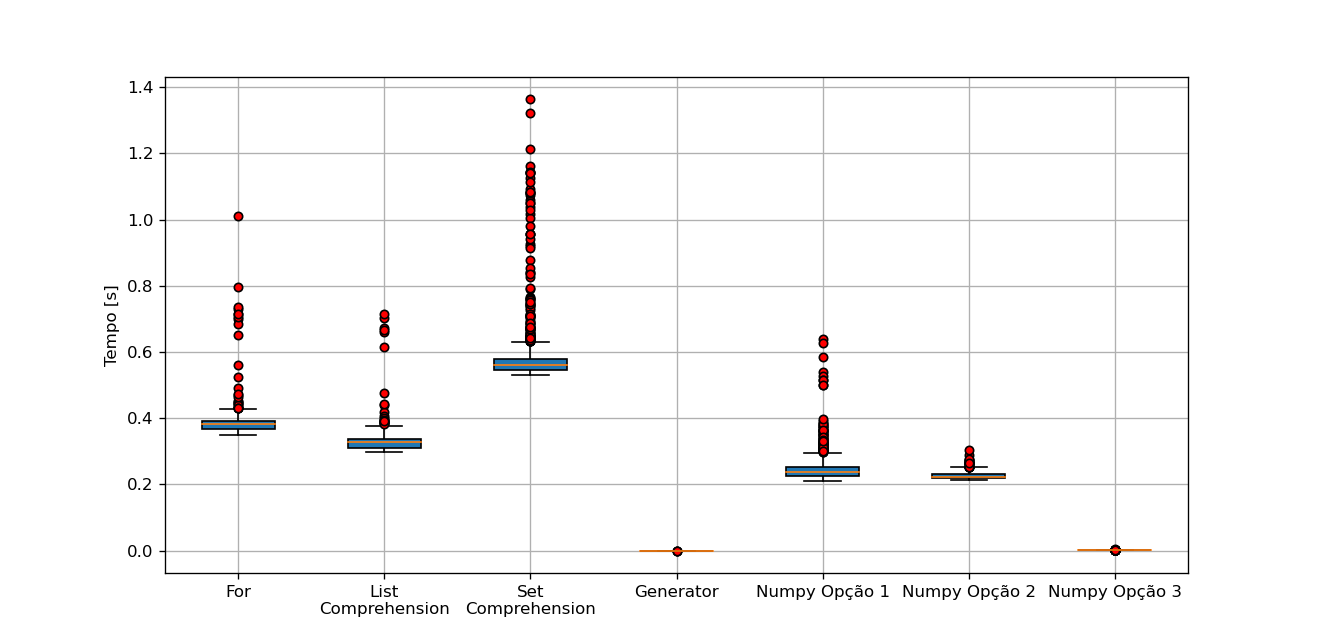

,Mínimo,Máximo,Média,Variância,STD
Generator,3.45599e-07,3.97840e-06,7.83232e-07,1.24188e-13,3.52404e-07
Numpy Opção 3,1.48462e-03,3.34773e-03,1.75637e-03,2.76050e-08,1.66148e-04
Numpy Opção 2,2.14643e-01,3.02617e-01,2.26668e-01,1.07744e-04,1.03800e-02
Numpy Opção 1,2.09353e-01,6.38054e-01,2.47289e-01,1.78003e-03,4.21904e-02
List\nComprehension,2.96593e-01,7.16251e-01,3.29568e-01,1.10357e-03,3.32200e-02
For,3.49827e-01,1.01005e+00,3.85478e-01,1.78434e-03,4.22415e-02
Set\nComprehension,5.30174e-01,1.36311e+00,5.86499e-01,9.75003e-03,9.87422e-02


In [10]:
"""
Graficando os dados e mostrando as estatísticas dos códigos comparados
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib notebook
pd.options.display.float_format = '{:.5e}'.format
colunas = "Mínimo Máximo Média Variância STD".split(" ")
filas = "For-List\nComprehension-Set\nComprehension-Generator-Numpy Opção 1-Numpy Opção 2-Numpy Opção 3".split("-")
resultados = np.array([np.loadtxt("Dados_exemplo1/Dados_exemplo1_for_repeat=1000_number=5.csv"),
                     np.loadtxt("Dados_exemplo1/Dados_exemplo1_lc_repeat=1000_number=5.csv"),
                     np.loadtxt("Dados_exemplo1/Dados_exemplo1_sc_repeat=1000_number=5.csv"),
                     np.loadtxt("Dados_exemplo1/Dados_exemplo1_gen_repeat=1000_number=5.csv"),
                     np.loadtxt("Dados_exemplo1/Dados_exemplo1_np1_repeat=1000_number=5.csv"),
                     np.loadtxt("Dados_exemplo1/Dados_exemplo1_np2_repeat=1000_number=5.csv"),
                      np.loadtxt("Dados_exemplo1/Dados_exemplo1_np3_repeat=1000_number=5.csv")]).T
comparacao = np.c_[np.amin(resultados, axis=0),
                   np.amax(resultados, axis=0),
                   np.mean(resultados, axis=0),
                   np.var(resultados, axis=0),
                   np.std(resultados, axis=0)]
comparacao_df = pd.DataFrame(data=comparacao,
                             index=filas,
                             columns=colunas)
plt.boxplot(resultados,
            labels=filas,
            patch_artist=True,
            boxprops=dict(facecolor="C0"),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=5))
plt.ylabel("Tempo [s]")
plt.grid(True);
comparacao_df.sort_values(by=["Média"])

## Exemplo 2
Vamos trabalhar com vetor de 100.000 valores aleatórios com média 5 e desvio padrão de 4,5 e estamos interessados em aplicar a seguinte função e calcular:

$$f(x) = x^3 + {{5} \over {\pi}}x^{{1}\over{2}} – {{x}\over{x^2 + 1}}$$

- Aplicar a função para cada valor;
- Calcular a soma do novo vetor.
  
Para conseguir este resultado vamos aplicar:
- Loop for opção 1;
- Loop for opção 2;
- Loop for opção 3;
- list comprehension;
- generator;
- numpy;
- map.
---

In [11]:
import numpy as np
NUMERO_DE_ELEMENTOS = 100_000
vetor = np.random.normal(5, 4.5, NUMERO_DE_ELEMENTOS)
vetor

array([ 6.71083236,  7.1600343 , 10.4940183 , ...,  3.805897  ,
        2.09660967,  7.70482964])

### Utilizando `For` Opção 1

In [12]:
vetor_fun_for1 = []
soma = 0
for valor in vetor:
    vetor_fun_for1.append(valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1))
    soma  += vetor_fun_for1[-1]
    

In [ ]:
import timeit
REPEAT = 5 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 2 # Quantidade de vezes que será executado o código
setup_codigo = '''
import numpy as np
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = np.random.normal(5, 4.5, NUMERO_DE_ELEMENTOS)
'''
validar_codigo = '''
vetor_fun_for1 = []
soma = 0
for valor in vetor:
    vetor_fun_for1.append(valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1))
    soma  += vetor_fun_for1[-1]'''
tempo_exemplo2_for1 = np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=validar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER

# np.savetxt(f"Dados_exemplo2_for1_repeat={REPEAT}_number={NUMBER}.csv",
#            tempo_exemplo2_for1)
tempo_exemplo2_for1

### Utilizando `for` opção 2

In [13]:
vetor_fun_for2 = []
soma = 0.0
for valor in vetor:
    vetor_fun_for2.append(valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1))
    soma  += vetor_fun_for2[-1]

In [ ]:
import timeit
REPEAT = 5 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 3 # Quantidade de vezes que será executado o código
setup_codigo = '''
import numpy as np
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = np.random.normal(5, 4.5, NUMERO_DE_ELEMENTOS)
'''
validar_codigo = '''
vetor_fun_for2 = []
soma = 0.0
for valor in vetor:
    vetor_fun_for2.append(valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1))
    soma  += vetor_fun_for2[-1]'''
tempo_exemplo2_for2 = np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=validar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER
# np.savetxt(f"Dados_exemplo2_for2_repeat={REPEAT}_number={NUMBER}.csv",
#            tempo_exemplo2_for2)
tempo_exemplo2_for2

### Utilizando `for` opção 3

In [14]:
vetor_fun_for3 = []
for valor in vetor:
    vetor_fun_for3.append(valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1))
soma = sum(vetor_fun_for3)

In [ ]:
import timeit
REPEAT = 5 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 3 # Quantidade de vezes que será executado o código
setup_codigo = '''
import numpy as np
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = np.random.normal(5, 4.5, NUMERO_DE_ELEMENTOS)
'''
validar_codigo = '''
vetor_fun_for3 = []
for valor in vetor:
    vetor_fun_for3.append(valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1))
soma = sum(vetor_fun_for3)'''
tempo_exemplo2_for3= np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=validar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER

# np.savetxt(f"Dados_exemplo2_for3_repeat={REPEAT}_number={NUMBER}.csv",
#            tempo_exemplo2_for3)
tempo_exemplo2_for3

### Utilizando `list comprenhension`

In [18]:
vetor_fun_lc = [valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1) for valor in vetor]
sum(vetor_fun_lc)

43091211.91307567

In [ ]:
import timeit
REPEAT = 5 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 3 # Quantidade de vezes que será executado o código
setup_codigo = '''
import numpy as np
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = np.random.normal(5, 4.5, NUMERO_DE_ELEMENTOS)
'''
validar_codigo = '''
vetor_fun_lc = [valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1) for valor in vetor]
sum(vetor_fun_lc)'''
tempo_exemplo2_lc= np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=validar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER

# np.savetxt(f"Dados_exemplo2_lc_repeat={REPEAT}_number={NUMBER}.csv",
#            tempo_exemplo2_lc)
tempo_exemplo2_lc

### Utilizando `generetors`

In [17]:
vetor_fun_gen = (valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1) for valor in vetor)
sum(vetor_fun_gen)

43091211.91307567

In [ ]:
import timeit
REPEAT = 5 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 3 # Quantidade de vezes que será executado o código
setup_codigo = '''
import numpy as np
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = np.random.normal(5, 4.5, NUMERO_DE_ELEMENTOS)
'''
validar_codigo = '''
vetor_fun_gen = (valor**3+ 5/3.141516*valor**1/2 - valor/(valor**2 + 1) for valor in vetor)
#sum(vetor_fun_gen)
'''
tempo_exemplo2_gen = np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=validar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER

# np.savetxt(f"Dados_exemplo2_gen2_repeat={REPEAT}_number={NUMBER}.csv",
#            tempo_exemplo2_gen)
tempo_exemplo2_gen

### Utilizando `Numpy`

In [19]:
vetor_fun_np = vetor**3 + 5/3.141516*vetor**1/2 - vetor/(vetor**2 + 1)
vetor_fun_np.sum()

43091211.913076185

In [ ]:
import timeit
REPEAT  = 5 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 3 # Quantidade de vezes que será executado o código
setup_codigo = '''
import numpy as np
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = np.random.normal(5, 4.5, NUMERO_DE_ELEMENTOS)
'''
validar_codigo = '''
vetor_fun_np = vetor**3 + 5/3.141516*vetor**1/2 - vetor/(vetor**2 + 1)
vetor_fun_np.sum()'''
tempo_exemplo2_np2 = np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=validar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER
# tempo_exemplo1_for
# np.savetxt(f"Dados_exemplo2_np2_repeat={REPEAT}_number={NUMBER}.csv",
#            tempo_exemplo2_np2)
tempo_exemplo2_np2

### Utilizando `map()`

In [20]:
vetor_fun_map = map(lambda x: x**3 +5/3.141516*x**1/2 - x/(x**2 + 1), vetor)
sum(vetor_fun_map)

43091211.91307567

In [ ]:
import timeit
REPEAT = 5 # Quantidade de vezes que será medido o tempo de execução
NUMBER = 3 # Quantidade de vezes que será executado o código
setup_codigo = '''
import numpy as np
NUMERO_DE_ELEMENTOS = 1_000_000
vetor = np.random.normal(5, 4.5, NUMERO_DE_ELEMENTOS)
'''
validar_codigo = '''
vetor_fun_map = map(lambda x: x**3 +5/3.141516*x**1/2 - x/(x**2 + 1), vetor)
sum(vetor_fun_map)'''
tempo_exemplo2_map = np.array(timeit.repeat(setup=setup_codigo,
                                         stmt=validar_codigo,
                                         repeat=REPEAT,
                                         number=NUMBER))/NUMBER

# np.savetxt(f"Dados_exemplo2_map_repeat={REPEAT}_number={NUMBER}.csv",
#            tempo_exemplo2_map)
tempo_exemplo2_map 

<IPython.core.display.Javascript object>


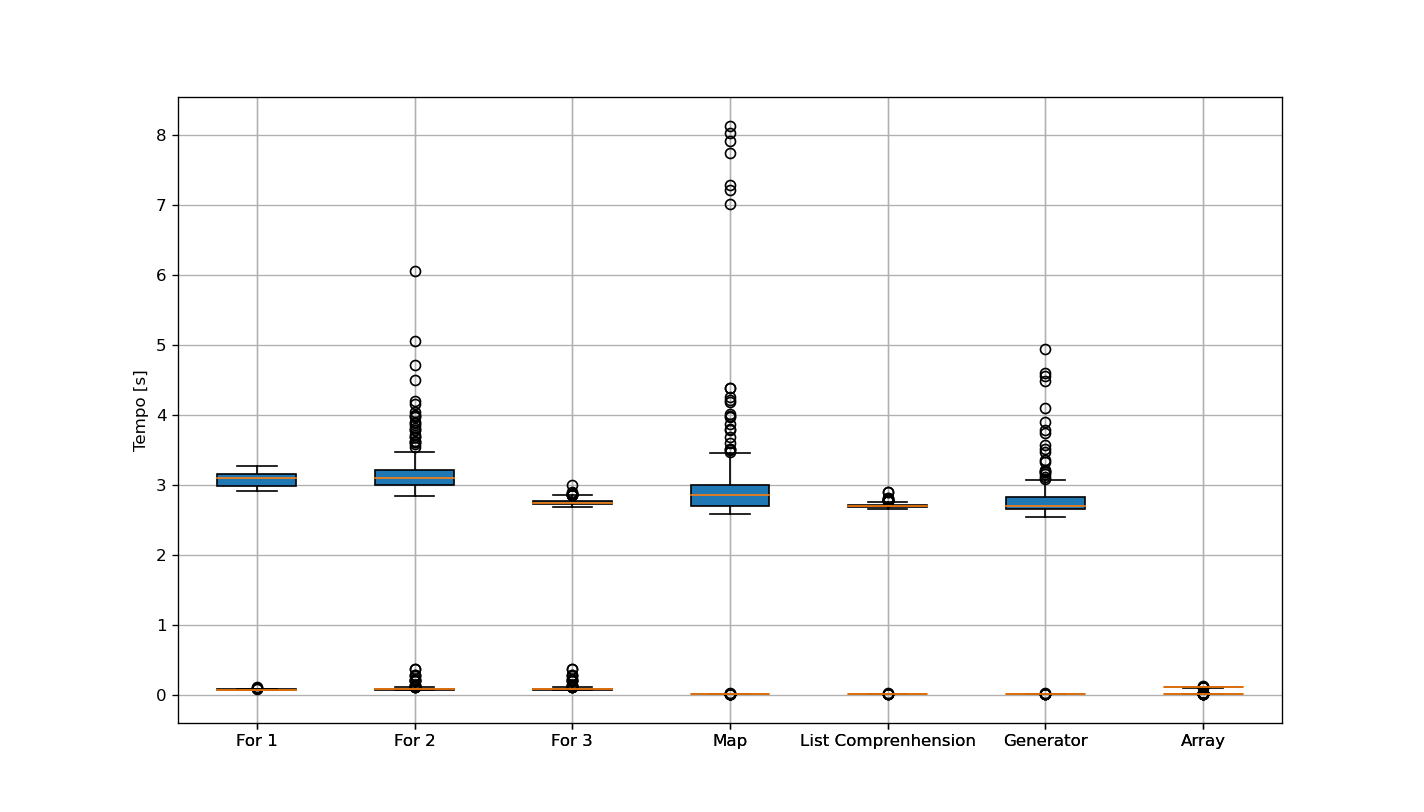

,Mínimo,Máximo,Média,Variância,STD
Array,9.80313e-02,1.25195e-01,1.01839e-01,6.05286e-06,2.46026e-03
List Comprenhension,2.64782e+00,2.89671e+00,2.69795e+00,1.08059e-03,3.28723e-02
For 3,2.68387e+00,2.99305e+00,2.75420e+00,2.06604e-03,4.54537e-02
Generator,2.53779e+00,4.94324e+00,2.79164e+00,1.02795e-01,3.20617e-01
Map,2.58001e+00,8.13596e+00,3.04590e+00,7.14148e-01,8.45073e-01
For 1,2.90484e+00,3.27195e+00,3.07268e+00,7.55399e-03,8.69137e-02
For 2,2.84428e+00,6.05782e+00,3.18159e+00,1.21931e-01,3.49187e-01


In [21]:
"""
Graficando os dados e mostrando as estatísticas dos códigos comparados
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib notebook
pd.options.display.float_format = '{:.5e}'.format
colunas = "Mínimo Máximo Média Variância STD".split(" ")
filas = "For 1,For 2,For 3,Map,List Comprenhension,Generator,Array".split(",")
filas_df = list(nome for nome in filas for _ in range(250)) 

resultados = np.array([np.loadtxt("Dados_exemplo2/Dados_exemplo2_for1_repeat=250_number=5.csv"),
                       np.loadtxt("Dados_exemplo2/Dados_exemplo2_for2_repeat=250_number=5.csv"),
                       np.loadtxt("Dados_exemplo2/Dados_exemplo2_for3_repeat=250_number=5.csv"),
                       np.loadtxt("Dados_exemplo2/Dados_exemplo2_map_repeat=250_number=5.csv"),
                       np.loadtxt("Dados_exemplo2/Dados_exemplo2_lc_repeat=250_number=5.csv"),
                       np.loadtxt("Dados_exemplo2/Dados_exemplo2_gen_repeat=250_number=5.csv"),
                       np.loadtxt("Dados_exemplo2/Dados_exemplo2_np_repeat=250_number=5.csv")]).T
comparacao = np.c_[np.amin(resultados, axis=0),
                   np.amax(resultados, axis=0),
                   np.mean(resultados, axis=0),
                   np.var(resultados, axis=0),
                   np.std(resultados, axis=0)]
comparacao_df = pd.DataFrame(data=comparacao,
                             index=filas,
                             columns=colunas)
boxplot_python = plt.boxplot(resultados,
                             labels=filas,
                             patch_artist=True,
                             boxprops=dict(facecolor="C0"),
                             showfliers=True)
plt.ylabel("Tempo [s]")
plt.grid(True);
comparacao_df.sort_values(by=["Média"])

# Julia

<IPython.core.display.Javascript object>


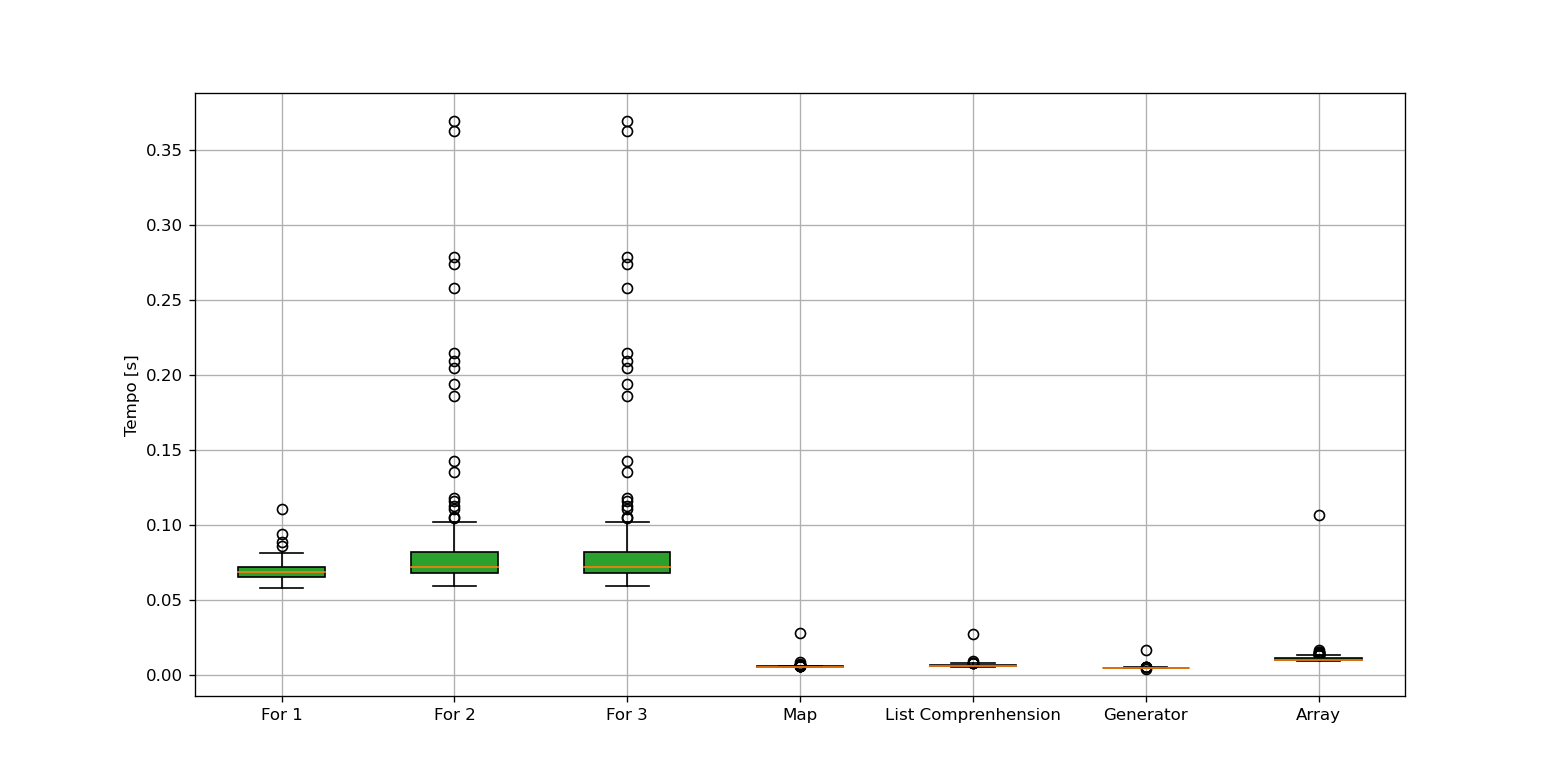

,Mínimo,Máximo,Média,Variância,STD
Generator,4.40000e-03,1.68000e-02,4.97200e-03,5.84656e-07,7.64628e-04
Map,5.40000e-03,2.80000e-02,5.82320e-03,2.08826e-06,1.44508e-03
List Comprenhension,5.40000e-03,2.72000e-02,6.32800e-03,2.16218e-06,1.47043e-03
Array,9.20000e-03,1.06800e-01,1.11016e-02,3.82308e-05,6.18311e-03
For 1,5.82000e-02,1.10800e-01,6.92112e-02,3.61605e-05,6.01336e-03
For 2,5.94000e-02,3.69400e-01,8.29320e-02,1.55589e-03,3.94448e-02
For 3,5.94000e-02,3.69400e-01,8.29320e-02,1.55589e-03,3.94448e-02


In [23]:
# Julia
resultados_jl = np.array([np.loadtxt("Dados_julia/Dados Julia for1 repeat=5 samples=250.csv"),
                       np.loadtxt("Dados_julia/Dados Julia for2 repeat=5 samples=250.csv"),
                       np.loadtxt("Dados_julia/Dados Julia for2 repeat=5 samples=250.csv"),
                       np.loadtxt("Dados_julia/Dados Julia map repeat=5 samples=250.csv"),
                       np.loadtxt("Dados_julia/Dados Julia lc repeat=5 samples=250.csv"),
                       np.loadtxt("Dados_julia/Dados Julia gen repeat=5 samples=250.csv"),
                       np.loadtxt("Dados_julia/Dados Julia arr repeat=5 samples=250.csv")]).T
comparacao_jl = np.c_[np.amin(resultados_jl, axis=0),
                   np.amax(resultados_jl, axis=0),
                   np.mean(resultados_jl, axis=0),
                   np.var(resultados_jl, axis=0),
                   np.std(resultados_jl, axis=0)]
comparacao_jl_df = pd.DataFrame(data=comparacao_jl,
                             index=filas,
                             columns=colunas)

boxplot_julia =plt.boxplot(resultados_jl,
                           labels=filas,
                           patch_artist=True,
                           boxprops=dict(facecolor="C2"),
                           showfliers=True)
plt.ylabel("Tempo [s]")
plt.grid(True)
plt.show();
comparacao_jl_df.sort_values(by=["Média"])

# Python vs Julia

<IPython.core.display.Javascript object>


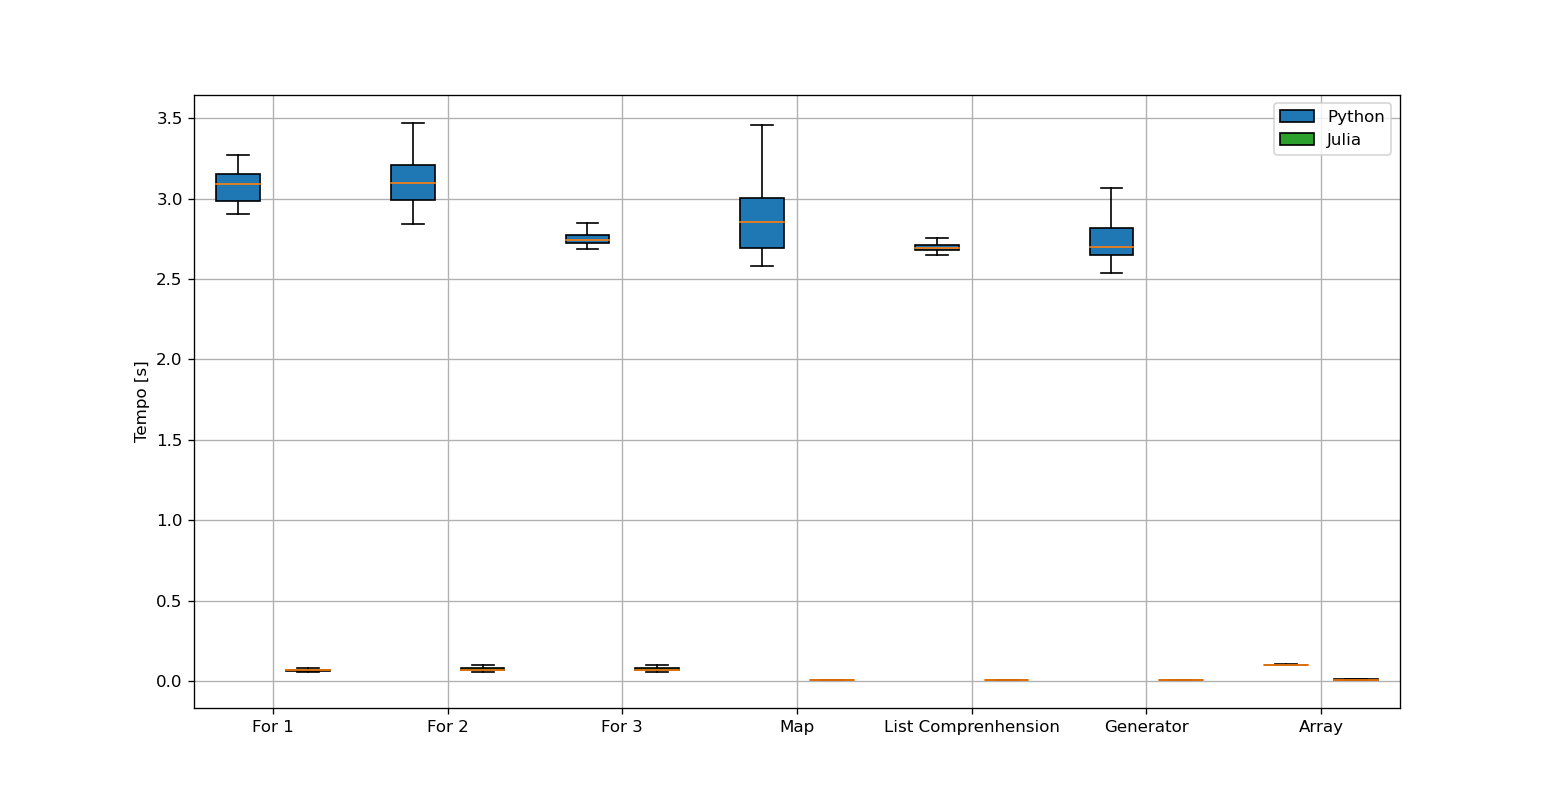

In [24]:
boxplot_python = plt.boxplot(resultados,
                             positions=np.arange(1, len(filas)+1)*2.0-0.4,
                             patch_artist=True,
                             boxprops=dict(facecolor="C0"),
                             showfliers=False)
boxplot_julia =plt.boxplot(resultados_jl,
                           positions=np.arange(1, len(filas)+1)*2.0+0.4,
                           patch_artist=True,
                           boxprops=dict(facecolor="C2"),
                           showfliers=False)
plt.legend([boxplot_python["boxes"][0],
            boxplot_julia["boxes"][0]], ['Python', 'Julia'], loc='upper right')
plt.xticks(np.arange(1, len(filas)+1)*2, filas)
plt.ylabel("Tempo [s]")
plt.grid(True)
plt.show()